In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
def initialize_params_deep(layer_dims, X):
  # u = len(layer_dims)
  params = {}
  a =  0
  rows = X.shape[0]
  for i in range(len(layer_dims)):
    if not(a):
      W = np.random.randn(layer_dims[i],rows) * 0.01 # Using randn and scaling, this works but using rand does not so beware
      a = 1
    else:
      W = np.random.randn(layer_dims[i],layer_dims[i-1]) * 0.01

    b = np.zeros((layer_dims[i],1))
    params[f"W{i+1}"] = W
    params[f"b{i+1}"] = b

  return params

In [3]:
def sigmoid(Z):
  A = 1 / (1+ np.exp(-Z))
  cache = (Z)
  return A, cache


In [4]:
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

In [5]:
def relu(Z):
  A = np.maximum(0,Z)
  cache = Z
  return A,cache

In [31]:
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)

    dZ[Z <= 0] = 0
    return dZ

In [7]:
def linear_forward(A,W,b):
  Z =  np.dot(W,A) + b #A : activations from the previous layer
  cache = (A,W,b)
  return Z,cache

In [8]:
def linear_activation_forward(A_prev, W, b, activation):

  if activation == "sigmoid":
    Z, linear_cache = linear_forward(A_prev,W,b)
    A, activation_cache = sigmoid(Z)

  else :
    Z, linear_cache = linear_forward(A_prev,W,b)
    A, activation_cache = relu(Z)

  cache = (linear_cache, activation_cache)

  return A , cache

In [30]:
def L_model_forward(X, parameters):
  A = X
  caches = []
  num_layers = len(parameters) // 2

  for i in range(1, num_layers):
    A_prev = A
    A, cache = linear_activation_forward(A_prev, parameters[f"W{i}"], parameters[f"b{i}"], "relu")
    caches.append(cache)

  AL, cache = linear_activation_forward(A, parameters[f"W{num_layers}"], parameters[f"b{num_layers}"], "sigmoid")
  caches.append(cache)

  return AL, caches

In [29]:
def compute_cost(y_pred,y):
  m = y.shape[1]
  epsilon = 1e-8
  y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

  cost = (-1/m) * np.sum(np.multiply(y, np.log(y_pred)) + np.multiply((1-y), np.log(1-y_pred)))
  cost = np.squeeze(cost) # Ensure cost is a single scalar
  return cost

In [11]:
def linear_backward(dZ,cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = (1/m) * np.dot(dZ, A_prev.T)
    db = (1/m) * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T,dZ)

    return dA_prev, dW, db

In [12]:
def linear_activation_backward(dA, cache, activation):
  linear_cache, activation_cache = cache

  if activation == "relu":
    dZ = relu_backward(dA, activation_cache)
  elif activation == "sigmoid":
    dZ = sigmoid_backward(dA, activation_cache)

  dA_prev, dW, db = linear_backward(dZ,linear_cache)

  return dA_prev, dW, db

In [28]:
def L_model_backward(AL, Y, caches):
  grads = {}
  num_layers = len(caches) # gives number of layers in NN (hidden + output)
  m = AL.shape[1]
  Y = Y.reshape(AL.shape)
  epsilon = 1e-8
  dAL = - (np.divide(Y, AL + epsilon) - np.divide(1 - Y, 1 - AL + epsilon))

  current_cache = caches[num_layers - 1]
  grads[f"dA{num_layers - 1}"], grads[f"dW{num_layers}"], grads[f"db{num_layers}"] = linear_activation_backward(dAL, current_cache, "sigmoid")


  for l in reversed(range(num_layers - 1)):
    current_cache = caches[l]
    dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads[f"dA{l + 1}"], current_cache, activation = "relu")

    grads[f"dA{l}"] = dA_prev_temp
    grads[f"dW{l+1}"] = dW_temp
    grads[f"db{l+1}"] = db_temp


  return grads

In [43]:
def update_parameters(params, grads, learning_rate):
  parameters = params.copy()
  L = len(parameters) // 2

  for l in range(L):
    parameters[f"W{l+1}"] = parameters[f"W{l+1}"]  - (learning_rate*grads[f"dW{l+1}"])

    parameters[f"b{l+1}"] = parameters[f"b{l+1}"]  - (learning_rate*grads[f"db{l+1}"])


  return parameters

In [ ]:
data = pd.read_csv

First, let's open the H5 file and see what keys (datasets or groups) it contains.

In [15]:
# Replace 'your_file.h5' with the actual path to your H5 file
h5_file_path = 'train_catvnoncat (2).h5'

try:
    with h5py.File(h5_file_path, 'r') as f:
        print("Keys in the H5 file:")
        for key in f.keys():
            print(key)

        # You can access datasets like this:
        # dataset_name = 'name_of_a_dataset_from_the_output_above'
        # if dataset_name in f:
        #     data = f[dataset_name][()] # Read the dataset into a numpy array
        #     print(f"\nData from dataset '{dataset_name}':")
        #     print(data)
        #     # If the data is structured like a table, you can convert it to a pandas DataFrame
        #     # df = pd.DataFrame(data)
        #     # display(df.head())

except FileNotFoundError:
    print(f"Error: The file '{h5_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Keys in the H5 file:
list_classes
train_set_x
train_set_y


Once you know the names of the datasets within the H5 file (printed in the output above), you can uncomment and modify the code in the `try` block to load a specific dataset and potentially convert it to a pandas DataFrame if its structure is suitable. Remember that H5 files can store various types of data, not just tabular data like DataFrames.

In [42]:
h5_file_path = 'train_catvnoncat (2).h5'

try:
    with h5py.File(h5_file_path, 'r') as f:
        # Load 'train_set_x' into a numpy array
        if 'train_set_x' in f:
            train_set_x_data = f['train_set_x'][()]
            print("Loaded 'train_set_x' as numpy array.")
        else:
            print("Dataset 'train_set_x' not found in the H5 file.")
            train_set_x_data = None # Ensure variable is defined even if dataset is not found

        # Load 'train_set_y' into a numpy array
        if 'train_set_y' in f:
            train_set_y_data = f['train_set_y'][()]
            print("Loaded 'train_set_y' as numpy array.")
        else:
            print("Dataset 'train_set_y' not found in the H5 file.")
            train_set_y_data = None # Ensure variable is defined even if dataset is not found

except FileNotFoundError:
    print(f"Error: The file '{h5_file_path}' was not found.")
    train_set_x_data = None
    train_set_y_data = None
except Exception as e:
    print(f"An error occurred: {e}")
    train_set_x_data = None
    train_set_y_data = None

# You can still try to display parts of the data or convert to DataFrame if appropriate
# Example: Display shape of loaded arrays
if train_set_x_data is not None:
    print(f"Shape of train_set_x_data: {train_set_x_data.shape}")
if train_set_y_data is not None:
    print(f"Shape of train_set_y_data: {train_set_y_data.shape}")

# If you still want to try converting to DataFrame, handle the structure appropriately
# For train_set_x (image data), a direct conversion might not be meaningful
# If train_set_y is 1D, it might be convertible
# if train_set_y_data is not None and train_set_y_data.ndim == 1:
#      df_train_y = pd.DataFrame(train_set_y_data, columns=['label'])
#      print("\nDataFrame for 'train_set_y':")
#      display(df_train_y.head())

Loaded 'train_set_x' as numpy array.
Loaded 'train_set_y' as numpy array.
Shape of train_set_x_data: (209, 64, 64, 3)
Shape of train_set_y_data: (209,)


Let's inspect the shapes of the loaded NumPy arrays and display a sample image.

Shape of train_set_x_data: (209, 64, 64, 3)
Shape of train_set_y_data: (209,)


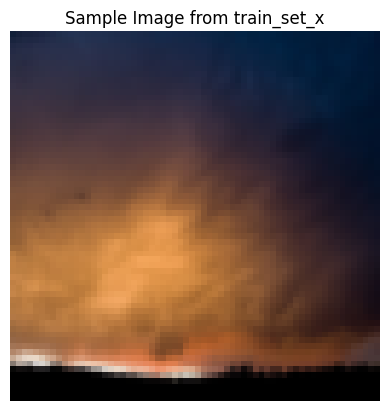

In [17]:
print(f"Shape of train_set_x_data: {train_set_x_data.shape}")
print(f"Shape of train_set_y_data: {train_set_y_data.shape}")

# Display a sample image (assuming it's image data)
if train_set_x_data.ndim == 4:
    plt.imshow(train_set_x_data[0])
    plt.title("Sample Image from train_set_x")
    plt.axis('off')
    plt.show()

array([[[196, 192, 190],
        [193, 186, 182],
        [188, 179, 174],
        ...,
        [ 90, 142, 200],
        [ 90, 142, 201],
        [ 90, 142, 201]],

       [[230, 229, 229],
        [204, 199, 197],
        [193, 186, 181],
        ...,
        [ 91, 143, 201],
        [ 91, 143, 201],
        [ 91, 143, 201]],

       [[232, 225, 224],
        [235, 234, 234],
        [208, 205, 202],
        ...,
        [ 91, 144, 202],
        [ 91, 144, 202],
        [ 92, 144, 202]],

       ...,

       [[ 18,  17,  15],
        [ 14,  14,  13],
        [ 29,  29,  32],
        ...,
        [ 83,  81,  81],
        [ 84,  82,  83],
        [ 82,  81,  82]],

       [[ 22,  20,  18],
        [ 16,  15,  14],
        [ 25,  24,  24],
        ...,
        [ 82,  80,  80],
        [ 83,  81,  82],
        [ 82,  81,  81]],

       [[ 45,  43,  39],
        [ 61,  59,  54],
        [ 81,  78,  74],
        ...,
        [ 83,  82,  81],
        [ 84,  82,  82],
        [ 82,  80,  81]]], dtype=uint8)
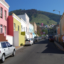

In [18]:
# plt.imshow(train_set_x_data[80])
train_set_x_data[1]

In [49]:
train_x_flatten = train_set_x_data.reshape(train_set_x_data.shape[0],-1).T #WhyTF we are taking transpose here know it more clearly
train_y_flatten = train_set_y_data.reshape(train_set_y_data.shape[0],-1).T

In [85]:
train_x_flatten = train_x_flatten.astype(float) / 255.

In [83]:
train_x_flatten[:10]

array([[ 17, 196,  82, ..., 143,  22,   8],
       [ 31, 192,  71, ..., 155,  24,  28],
       [ 56, 190,  68, ..., 165,  23,  53],
       ...,
       [ 35, 179,  98, ..., 149,  26,  35],
       [ 62, 174, 104, ..., 155,  25,  61],
       [ 25, 213, 106, ..., 135,  24,  19]], dtype=uint8)

In [76]:
def l_layer_network(X,Y,layer_dims, l_rate,n_iter):
  params = initialize_params_deep(layer_dims,X)
  for i in range(n_iter):
    Al, caches = L_model_forward(X,params)
    cost = compute_cost(Al, Y)
    if i%100==0:
      print(f"Cost of iteration {i} is {cost}")
    grads = L_model_backward(Al,Y,caches)
    params = update_parameters(params,grads,l_rate)
  return params # Return the final trained parameters

In [91]:
# layer_dims = [12288,20,7,5,1] took like 18 mins for a single pass beware of your NN size
layer_dims = [20,7,5,1]

In [90]:
parameters = l_layer_network(train_x_flatten,train_y_flatten,layer_dims, 0.0075,1000)

Cost of iteration 0 is 0.6931466430037496
Cost of iteration 100 is 0.6780099291977538


KeyboardInterrupt: 

In [ ]:
L_model_forward(train_x_flatten,parameters)

In [80]:
# Predict on the training set
train_predictions,_ = L_model_forward(train_x_flatten,parameters)
train_predictions = train_predictions >= 0.5

# Calculate training accuracy
training_accuracy = np.mean(train_predictions == train_y_flatten) * 100

print(f"Training Accuracy: {training_accuracy}%")

Training Accuracy: 65.55023923444976%
